In [2]:
#MUST RUN
#import code

import pandas as pd
import numpy as np
import math
import random
import collections
import itertools
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [3]:
#MUST RUN
#establishes deck of cards

suits = ["s", "h", "d", "c"]
cards = ["2","3","4","5","6","7","8","9","T","J","Q","K","A"]
deck = [cards[i] + suits[j] for j in range(len(suits)) for i in range(len(cards)) ]

In [4]:
#MUST RUN
#establishes functions to determine hand strength

def check_quads(num_counts, numbers_to_values):

    score = 7
    score += numbers_to_values[num_counts.most_common()[0][0]]        
    score += numbers_to_values[num_counts.most_common()[1][0]]/100

    return score

def check_full_house(num_counts, numbers_to_values):

    score = 6
    score += numbers_to_values[num_counts.most_common()[0][0]]
    score += numbers_to_values[num_counts.most_common()[1][0]]/100

    return score

def check_three_kind(num_counts, numbers_to_values):

    score = 3
    score += numbers_to_values[num_counts.most_common()[0][0]]

    singles = sorted([num_counts.most_common()[1][0],num_counts.most_common()[2][0]], reverse=True)

    score += numbers_to_values[singles[0]]/100
    score += numbers_to_values[singles[1]]/100/100   
    
    return score

def check_two_pair(num_counts, numbers_to_values):
    
    score = 2

    doubles = sorted([num_counts.most_common()[0][0],num_counts.most_common()[1][0]], reverse=True)

    score += numbers_to_values[doubles[0]]
    score += numbers_to_values[doubles[1]]/100

    score += numbers_to_values[num_counts.most_common()[2][0]]/100/100
    
    return score

def check_one_pair(num_counts, numbers_to_values):
    
    score = 1
    score += numbers_to_values[num_counts.most_common()[0][0]]

    singles = sorted([num_counts.most_common()[1][0],num_counts.most_common()[2][0],num_counts.most_common()[3][0]], reverse=True)

    score += numbers_to_values[singles[0]]/100
    score += numbers_to_values[singles[1]]/100/100
    score += numbers_to_values[singles[2]]/100/100/100
    
    return score

def check_high_card(magnitude_num, numbers_to_values):

    score = 0

    singles = sorted(magnitude_num, reverse=True)
    
    score += numbers_to_values[singles[0]]
    score += numbers_to_values[singles[1]]/100
    score += numbers_to_values[singles[2]]/100/100
    score += numbers_to_values[singles[3]]/100/100/100
    score += numbers_to_values[singles[4]]/100/100/100/100 
    
    return score

def check_straight(magnitude_num, numbers_to_values):
    
    score = 0
    
    if (len(np.unique(magnitude_num))==5) & (max(magnitude_num)-min(magnitude_num) == 4):
        
        score = 4
        
        score += numbers_to_values[max(magnitude_num)]
        
    elif (len(np.unique(magnitude_num))==5) & (sorted(magnitude_num, reverse=True)==[14, 5, 4, 3, 2]):
        
        score = 4
        
        score += numbers_to_values[5]
        
    return score
    
def check_flush(suits, magnitude_num, numbers_to_values):
    
    if len(np.unique(suits)) == 1:
        
        score = 5
        
        singles = sorted(magnitude_num, reverse=True)
        
        score += numbers_to_values[singles[0]]
        score += numbers_to_values[singles[1]]/100
        score += numbers_to_values[singles[2]]/100/100
        score += numbers_to_values[singles[3]]/100/100/100
        score += numbers_to_values[singles[4]]/100/100/100/100 
        
    else:
        
        score = 0
        
    return score

def calc_five_card_strength(five_cards):
    
    #straight flush: 8
    #four of a kind: 7
    #full house: 6
    #flush: 5
    #straight: 4
    #trips: 3
    #two pair: 2
    #pair: 1
    #high card: 0
    
    #ones digit is hand type
    #tens-hundreds digits are most important card(s)
    #next two digits are second most imporatant card(s), and so one
    
    score = 0
    
    cards_to_numbers = {"2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "T":10, "J":11, "Q":12, "K":13, "A":14}
    cards_to_values = {"2":.05, "3":.1, "4":.15, "5":.2, "6":.25, "7":.3, "8":.35, "9":.4, "T":.45, "J":.5, "Q":.55, "K":.6, "A":.65}
    numbers_to_values = dict(zip(cards_to_numbers.values(),cards_to_values.values()))
    
    magnitude = [five_cards[i][0] for i in range(len(five_cards))]
    magnitude_num = [cards_to_numbers[magnitude[i]] for i in range(len(magnitude))]
    
    suits = [five_cards[i][1] for i in range(len(five_cards))]
    
    num_counts = collections.Counter(magnitude_num)
    
    #check for quads
    if num_counts.most_common()[0][1] == 4:
        
        score = check_quads(num_counts, numbers_to_values)
    
    #check for full house
    elif (num_counts.most_common()[0][1] == 3) & (num_counts.most_common()[1][1] == 2):
        
        score = check_full_house(num_counts, numbers_to_values)
    
    #check for three of a kind
    elif (num_counts.most_common()[0][1] == 3):
        
        score = check_three_kind(num_counts, numbers_to_values)
    
    #check for two pair
    elif (num_counts.most_common()[0][1] == 2) & (num_counts.most_common()[1][1] == 2):
        
        score = check_two_pair(num_counts, numbers_to_values)
    
    #check for pair
    elif (num_counts.most_common()[0][1] == 2):
        
        score = check_one_pair(num_counts, numbers_to_values)
    
    #check for high card
    else:
        
        score = check_high_card(magnitude_num, numbers_to_values)
    
    straight = check_straight(magnitude_num, numbers_to_values)
    flush = check_flush(suits, magnitude_num, numbers_to_values)
    
    if (flush > 0) & (straight > 0):
        
        score = straight + 4
        
    else:
        
        score = max(score, flush, straight)
    
    return score

def calc_seven_card_strength(hand, board):
    
    all_scores = []
    
    for five_cards in list(itertools.combinations([*hand, *board],5)):
        
        all_scores.append(calc_five_card_strength(list(five_cards)))
        
    return max(all_scores)
    

In [5]:
#MUST RUN
#creates a class to represent a poker board state, with functions that modify itself

class board_state:
    def __init__(self, phase, hand1, hand2, board, mod_deck):
        self.phase = phase
        self.hand1 = hand1
        self.hand2 = hand2
        self.board = board
        self.mod_deck = mod_deck
    
    def show_state(self):
        print('Player 1 hand: ' + str(self.hand1))
        print('Player 2 hand: ' + str(self.hand2))
        print('Board: ' + str(self.board))
    
    def flop(self):
        if self.phase != 0:
            print('error: phase not preflop, cannot execute flop.')
            #error
        elif self.phase == 0:
            self.phase = 1
            self.board = random.sample(self.mod_deck, 3)
            
            self.mod_deck = [self.mod_deck[i] for i in range(len(self.mod_deck)) if self.mod_deck[i] not in self.board]
            
    def turn(self):
        if self.phase != 1:
            print('error: phase not flop, cannot execute turn.')
            #error
        elif self.phase == 1:
            self.phase = 2
            turn = random.sample(self.mod_deck, 1)[0]
            self.board.append(turn)
            
            self.mod_deck.remove(turn)
            
    def river(self):
        if self.phase != 2:
            print('error: phase not turn, cannot execute river.')
            #error
        elif self.phase == 2:
            self.phase = 3
            river = random.sample(self.mod_deck, 1)[0]
            self.board.append(river)
            
            self.mod_deck.remove(river)
            
    def calculate_winner(self):
        
        if self.phase != 3:
            
            print('error: phase not river, cannot calculate winner.')
            
        elif self.phase == 3:
        
            hand1_strength = calc_seven_card_strength(self.board,self.hand1)
            hand2_strength = calc_seven_card_strength(self.board,self.hand2)
            
            if hand1_strength > hand2_strength:

                return 1

            elif hand2_strength > hand1_strength:

                return 2

            else:

                return 0
            
    def all_phases_calculate(self):
        
        self.flop()
        self.turn()
        self.river()
        
        return self.calculate_winner()
        

In [6]:
# MUST RUN
#creates functions that create a board state

def start_game():
    
    hands = random.sample(deck, 4)
    
    hand1 = hands[0:2]
    hand2 = hands[2:4]
    
    mod_deck = [deck[i] for i in range(52) if deck[i] not in hands]
    
    X = board_state(0,hand1,hand2,[],mod_deck)
    
    return X

def start_game_with_hands(hand1, hand2):
    
    mod_deck = [deck[i] for i in range(52) if deck[i] not in [*hand1, *hand2]]
    
    X = board_state(0,hand1,hand2,[],mod_deck)
    
    return X

In [7]:
#MUST RUN
#compares two hands, runs iterations simulations and returns the number of times hand 1 won, hand 2 won, and ties.
#If equity is True, ignores ties

def simulate_hand_fight(hand1, hand2, iterations=1000, equity=True):
    
    results = [0,0,0]
    
    for trial in range(iterations):
        
        game_trial = start_game_with_hands(hand1, hand2)
        
        results[game_trial.all_phases_calculate()] += 1
        
    if equity==True:
        
        results = [results[1]+results[0]/2, results[2]+results[0]/2]
        
    return results

In [8]:
#creates matrix of handfight win probabilities of hands pitted against each other (52*51/2) by (52*51/2)

def create_pf_win_prob_matrix(iters):
    
    num_hands = int(52*51/2)
    
    #converts tuples to lists
    poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
    hand_nums = np.array(range(num_hands))
    num_to_hand = dict(zip(hand_nums, poss_hands))
    
    surplus_win_probs = np.zeros([num_hands,num_hands])
    
    for hand1_num in tqdm(range(num_hands)):
        
        for hand2_num in tqdm(range(hand1_num)):
            
            hand1 = num_to_hand[hand1_num]
            hand2 = num_to_hand[hand2_num]
            
            surplus_win_prob_p1 = (2*simulate_hand_fight(hand1,hand2, iters, True)[0]/iters-1)
            surplus_win_probs[hand1_num,hand2_num] = surplus_win_prob_p1
            surplus_win_probs[hand2_num,hand1_num] = -surplus_win_prob_p1
    
    return surplus_win_probs

In [9]:
#very complicated code that returns regret for both players after many iterations
#this is what we have to fix (for this specific sim) - i don't know if it's broken though lol
#we assume blocker effects don't exist here

def hu_pf_sim_v2(surplus_win_probs, num_iter = 10000, iters=100):
    
    #set overall parameters
    num_hands = int(52*51/2)
    stacks = 10 
    
    #create general variables/dicts needed later
    poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
    hand_nums = np.array(range(num_hands))
    num_to_hand = dict(zip(hand_nums, poss_hands))
    hand_to_num = {tuple(poss_hand): num for poss_hand, num in zip(poss_hands, hand_nums)}
    # hand_to_num = dict(zip(poss_hands, hand_nums))
    

    #create regret matrices; first element is fold, second is shove. We start with both equal to 1 such that each action is 50%
    p1_strats = np.array([[1, 1]] * num_hands).astype(float) #fold, shove
    p2_strats = np.array([[1, 1]] * num_hands).astype(float) #fold, call (conditional on p1 shoving)
    
    #the following code is the optimization and runs num_iter times
    for iter in tqdm(range(num_iter)):
        
        hand1_num = random.sample(list(hand_nums),1)[0]
        hand1 = num_to_hand[hand1_num]
        possible_hand2 = [subset_h2 for subset_h2 in num_to_hand.values() if not any(card in hand1 for card in subset_h2)]
        hand2 = random.sample(list(possible_hand2),1)[0]
        hand2_num = hand_to_num[tuple(hand2)]
        possible_hand1 = [subset_h1 for subset_h1 in num_to_hand.values() if not any(card in hand2 for card in subset_h1)]

        
        #an information set is one hand. we calculate win probability based on p1's hand against all possible hands p2 has, conditional on p2 calling
        #for now, IGNORE BLOCKER EFFECTS
        all_win_prob_p1 = 0
        total_prob_p2_calls = 0
        for hand_i in possible_hand2:
            hand_i = hand_to_num[tuple(hand_i)]
            per_hand_win_prob_p1 = (surplus_win_probs[hand1_num, hand_i]+1)/2
            
            #calc prob p1 bets
            if p2_strats[hand_i, 0]<=0:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold=.5
                else:
                    p2_sim_prob_fold=0
            else:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold=1
                else:
                    p2_sim_prob_fold = p2_strats[hand_i, 0]/sum(p2_strats[hand_i, :])
            
            all_win_prob_p1 = all_win_prob_p1 + (1-p2_sim_prob_fold)*per_hand_win_prob_p1
            total_prob_p2_calls = total_prob_p2_calls + (1-p2_sim_prob_fold)
        
        win_prob_p1 = all_win_prob_p1/total_prob_p2_calls
        
        #this code chunk calculates the expected win probability for player 2 given only their hand. we must condition on whether p1 will bet or not, so given that we face a bet, find our expected WP.
        all_win_prob_p2 = 0
        total_prob_p1_bets = 0
        for hand_i in possible_hand1:
            hand_i = hand_to_num[tuple(hand_i)]
            per_hand_win_prob_p2 = 1-(surplus_win_probs[hand_i, hand2_num]+1)/2
            
            #calc prob p1 bets
            if p1_strats[hand_i, 0]<=0:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold=.5
                else:
                    p1_sim_prob_fold=0
            else:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold=1
                else:
                    p1_sim_prob_fold = p1_strats[hand_i, 0]/sum(p1_strats[hand_i, :])
            
            all_win_prob_p2 = all_win_prob_p2 + (1-p1_sim_prob_fold)*per_hand_win_prob_p2
            total_prob_p1_bets = total_prob_p1_bets + (1-p1_sim_prob_fold)
        
        win_prob_p2 = all_win_prob_p2/total_prob_p1_bets
            
        #we now calculate, based on the regret matrices:
        #from p2's perspective, what is the probability that p1 folds
        #form p1's perspective, what is the probability that p2 folds
        #sim is your guess of the other person's action
        #con is your probability of action
        p1_sim_prob_fold = 0
        p2_sim_prob_fold = 0
        
        for hand_i in possible_hand1:
            hand_i = hand_to_num[tuple(hand_i)]

            if p1_strats[hand_i, 0]<=0:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold+=.5
                else:
                    p1_sim_prob_fold+=0
            else:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold+=1
                else:
                    p1_sim_prob_fold += p1_strats[hand_i, 0]/sum(p1_strats[hand_i, :])
        
        for hand_i in possible_hand2:
            hand_i = hand_to_num[tuple(hand_i)]
                    
                    
            if p2_strats[hand_i, 0]<=0:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold+=.5
                else:
                    p2_sim_prob_fold+=0
            else:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold+=1
                else:
                    p2_sim_prob_fold += p2_strats[hand_i, 0]/sum(p2_strats[hand_i, :])
                    
        p1_sim_prob_fold = p1_sim_prob_fold/len(possible_hand1)
        p2_sim_prob_fold = p2_sim_prob_fold/len(possible_hand2)
        
        if p2_strats[hand2_num, 0]<=0:
            if p2_strats[hand2_num, 1]<=0:
                p2_con_prob_fold=.5
            else:
                p2_con_prob_fold=0
        else:
            if p2_strats[hand2_num, 1]<=0:
                p2_con_prob_fold=1
            else:
                p2_con_prob_fold = p2_strats[hand2_num, 0]/sum(p2_strats[hand2_num, :])
              
        if p1_strats[hand1_num, 0]<=0:
            if p1_strats[hand1_num, 1]<=0:
                p1_con_prob_fold=.5
            else:
                p1_con_prob_fold=0
        else:
            if p1_strats[hand1_num, 1]<=0:
                p1_con_prob_fold=1
            else:
                p1_con_prob_fold = p1_strats[hand1_num, 0]/sum(p1_strats[hand1_num, :])
        
        #calculate actual payouts for folding and pushing
        p1_actual_payouts = np.array([0, 1.5*p2_sim_prob_fold + ((stacks+.5)*win_prob_p1-(stacks-.5)*(1-win_prob_p1))*(1-p2_sim_prob_fold)])
        p1_mixed_chosen_payout = np.dot([p1_con_prob_fold,(1-p1_con_prob_fold)],p1_actual_payouts)
        p1_regret = p1_actual_payouts-p1_mixed_chosen_payout
        
        #calculate actual payouts for folding and calling
        p2_actual_payouts = np.array([0, ((stacks+1)*(win_prob_p2)-(stacks-1)*(1-win_prob_p2))])*(1-p1_sim_prob_fold)
        p2_mixed_chosen_payout = np.dot([p2_sim_prob_fold,(1-p2_sim_prob_fold)],p2_actual_payouts)
        p2_regret = p2_actual_payouts-p2_mixed_chosen_payout
        
        p1_strats[hand1_num] = (p1_strats[hand1_num] + p1_regret)
        p2_strats[hand2_num] = (p2_strats[hand2_num] + p2_regret)
        
    return p1_strats, p2_strats

In [10]:
#create very approximated win prob matrix

# surplus_win_probs_1 = create_pf_win_prob_matrix(1)


In [43]:
surplus_win_probs_10_matrix = pd.read_csv('10_sim_hand_fight.csv', header=None)
surplus_win_probs_10 = surplus_win_probs_10_matrix.values

[[ 0.  -0.2 -0.2 ... -0.  -0.4 -0.2]
 [ 0.2  0.  -0.5 ... -0.2 -0.6 -0.4]
 [ 0.2  0.5  0.  ... -0.   0.4 -0.4]
 ...
 [ 0.   0.2  0.  ...  0.  -0.8 -0.6]
 [ 0.4  0.6 -0.4 ...  0.8  0.  -0.1]
 [ 0.2  0.4  0.4 ...  0.6  0.1  0. ]]


In [12]:
#find regrets per player

[p1_resp, p2_resp] = hu_pf_sim_v2(surplus_win_probs_10,100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [13]:
# print(p1_resp)
num_hands = int(52*51/2)
poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
hand_nums = np.array(range(num_hands))
num_to_hand = dict(zip(hand_nums, poss_hands))
hand_to_num = {tuple(poss_hand): num for poss_hand, num in zip(poss_hands, hand_nums)}
# print(hand_to_num)
# print(p1_resp[hand_to_num[("3s", "4s")]])
# print(p2_resp)

# np.savetxt("p1_resp.csv", p1_resp, delimiter=",")
# np.savetxt("p2_resp.csv", p2_resp, delimiter=",")

In [14]:
#view regrets for each hand

num_hands = int(52*51/2)
poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
new_array = [[p1_resp[i],poss_hands[i]] for i in range(len(poss_hands))]

In [15]:
push_fold_array = np.zeros([13,13])

cards_to_numbers = {"2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "T":10, "J":11, "Q":12, "K":13, "A":14}
numbers_to_cards = dict(zip(cards_to_numbers.values(),cards_to_numbers.keys()))

num_hands = int(52*51/2)
poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]

hands_to_idx = {tuple(poss_hands[i]): i for i in range(num_hands)}

offsuit_pairs = [['s', 'h'], ['s', 'd'], ['s', 'c'], ['h', 'd'], ['h', 'c'], ['d', 'c']]
suited_pairs = [['s','s'],['h','h'],['d','d'],['c','c']]

for card1 in range(13):
    for card2 in range(13):
        
        card1_num = (12-card2)+2 #reverse ordering
        card2_num = (12-card1)+2 #reverse ordering
        
        if card1 > card2:
            
            #offsuit
            pair_list = [[str(numbers_to_cards[card1_num])+offsuit_pairs[i][0],str(numbers_to_cards[card2_num])+offsuit_pairs[i][1]] for i in range(len(offsuit_pairs))] +\
                        [[str(numbers_to_cards[card2_num])+offsuit_pairs[i][0],str(numbers_to_cards[card1_num])+offsuit_pairs[i][1]] for i in range(len(offsuit_pairs))]
            
            total_regret = [0,0]
            for card_pair in pair_list:
                
                regret_matrix = p2_resp[hands_to_idx[tuple(card_pair)]]
                total_regret+=regret_matrix
                
            if regret_matrix[0]<=0:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=.5
                else:
                    push_fold_array[card1][card2]=1
            else:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=0
                else:
                    push_fold_array[card1][card2] = 1-regret_matrix[0]/sum(regret_matrix[:])
            
        if card1 == card2:
            
            #paired
            pair_list = [[str(numbers_to_cards[card1_num])+offsuit_pairs[i][0],str(numbers_to_cards[card2_num])+offsuit_pairs[i][1]] for i in range(len(offsuit_pairs))]
            
            total_regret = [0,0]
            for card_pair in pair_list:
                
                regret_matrix = p2_resp[hands_to_idx[tuple(card_pair)]]
                total_regret+=regret_matrix
                
            if regret_matrix[0]<=0:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=.5
                else:
                    push_fold_array[card1][card2]=1
            else:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=0
                else:
                    push_fold_array[card1][card2] = 1-regret_matrix[0]/sum(regret_matrix[:])
            
        if card1 < card2:
            
            #suited
            pair_list = [[str(numbers_to_cards[card1_num])+suited_pairs[i][0],str(numbers_to_cards[card2_num])+suited_pairs[i][1]] for i in range(len(suited_pairs))]
            
            total_regret = [0,0]
            for card_pair in pair_list:
                
                regret_matrix = p2_resp[hands_to_idx[tuple(card_pair)]]
                total_regret+=regret_matrix
                
            if regret_matrix[0]<=0:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=.5
                else:
                    push_fold_array[card1][card2]=1
            else:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=0
                else:
                    push_fold_array[card1][card2] = 1-regret_matrix[0]/sum(regret_matrix[:])
            

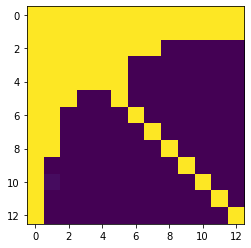

In [16]:
plt.imshow(push_fold_array)

In [17]:
suits = ["s", "h", "d", "c"]
values = ["2","3","4","5","6","7","8","9","T","J","Q","K","A"]
deck = [value + suit for suit in  suits for value in values]
num_hands = int(52*51/2)
poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
hand_nums = np.array(range(num_hands))
num_to_hand = dict(zip(hand_nums, poss_hands))
hand_to_num = {tuple(poss_hand): num for poss_hand, num in zip(poss_hands, hand_nums)}

keys = list(hand_to_num.keys()).copy()

for (card1, card2) in keys:
    hand_to_num[(card2, card1)] = hand_to_num[(card1, card2)]

In [18]:
games = pd.read_csv('gameplay.csv')

# # EV of bot
# bbEV = 0.0
# sbPlayEV = 0.0

# for _, game in games.iterrows():
#     if game['position'] == "sb":

#         if game['decision'] == "fold":
#             bbEV += 0.5
#         elif game["decision"] == "aggress":
#             # determine probability bot will call (given cards)
#             # bbEV += -1 * (probability bot will fold) + 10 * (probability bot will call and win) - 10 * (probability bot will call and lose)

#     elif game['position'] == "bb":
#         # conditions on bot having shoved -- we do not track when bot folds as sb

#         if game['decision'] == "fold":
#             sbPlayEV += 1
#         elif game["decision"] == "aggress":
#             # sbPlayEV += (probability bot will win given cards) * 10 + (probability bot will lose given cards) * -10
        

# # probability of being either blind = 1/2
# # Final EV is (probability bot will be small blind and fold) * -0.5 + (probability that bot will be big blind) * bbEV 
# # + (probability that bot will be small blind and shove) * sbPlayEV

In [28]:
# key is hand_to_num, value is % of time folded
bb_user_fold_perc = dict()
sb_user_fold_perc = dict()

# key is (card1 value, card2 value, suited), value is % of time folded
bb_user_fold_perc_merge = dict()
sb_user_fold_perc_merge = dict()

# key is hand_to_num, value is (# folds, # aggresses)
bb_user_act = dict()
sb_user_act = dict()

# key is (card1 value, card2 value, suited), value is (# folds, # aggresses)
bb_user_fold_act_merge = dict()
sb_user_fold_act_merge = dict()

for _, game in games.iterrows():

    card1 = str(game['card1']).replace("10", "T")
    card1  = card1[0] + card1[1].lower()
    card2 = str(game['card2']).replace("10", "T")
    card2  = card2[0] + card2[1].lower()

    if card1 == 'na' or card2 == 'na':
        continue

    hand = hand_to_num[(card1, card2)]

    if game['position'] == "sb":
        if hand not in sb_user_act:
            sb_user_act[hand] = [0, 0]

        key = (max(card1[0], card2[0]), min(card1[0], card2[0]), card1[1] == card2[1])
        if key not in sb_user_fold_act_merge:
            sb_user_fold_act_merge[key] = [0,0]

        if game['decision'] == "fold":
            sb_user_act[hand][0] += 1
            sb_user_fold_act_merge[key][0] += 1
        elif game['decision'] == "aggress":
            sb_user_act[hand][1] += 1
            sb_user_fold_act_merge[key][1] += 1

    if game['position'] == "bb":
        if hand not in bb_user_act:
            bb_user_act[hand] = [0, 0]

        key = (max(card1[0], card2[0]), min(card1[0], card2[0]), card1[1] == card2[1])
        if key not in bb_user_fold_act_merge:
            bb_user_fold_act_merge[key] = [0,0]

        if game['decision'] == "fold":
            bb_user_act[hand][0] += 1
            bb_user_fold_act_merge[key][0] += 1
        elif game['decision'] == "aggress":
            bb_user_act[hand][1] += 1
            bb_user_fold_act_merge[key][1] += 1

for key in sb_user_fold_act_merge.keys():
    sb_user_fold_perc_merge[key] = sb_user_fold_act_merge[key][0]/(sb_user_fold_act_merge[key][0] + sb_user_fold_act_merge[key][1])

for key in bb_user_fold_act_merge.keys():
    bb_user_fold_perc_merge[key] = bb_user_fold_act_merge[key][0]/(bb_user_fold_act_merge[key][0] + bb_user_fold_act_merge[key][1])

print(len(bb_user_fold_perc_merge))
print(len(sb_user_fold_perc_merge))

for card1 in values:
    for card2 in values:
        for suited in [True, False]:
            key = (max(card1, card2), min(card1, card2), suited)
            if key not in bb_user_fold_perc_merge and not(card1 == card2 and suited):
                print(f"{key} is not in the BB history")
            if key not in sb_user_fold_perc_merge and not(card1 == card2 and suited):
                print(f"{key} is not in the SB history")

167
169
('6', '2', True) is not in the BB history
('6', '2', True) is not in the BB history
('9', '7', True) is not in the BB history
('9', '7', True) is not in the BB history


In [29]:
bb_user_fold_perc_merge[('6', '2', True)] = 0
bb_user_fold_perc_merge[('9', '7', True)] = 0.4

In [49]:
sbEV = 0.0
bbEV = 0.0
EV = 0.0
gamesPlayed = 0

num_hands = int(52*51/2)

poss_hands = list(itertools.combinations(deck, 2))

# bot is BB
for hand1 in poss_hands:
    remaining_deck = [subset_h2 for subset_h2 in deck if not any(card in hand1 for card in subset_h2)]
    poss_hands_2 = list(itertools.combinations(remaining_deck, 2))

    card1, card2 = hand1

    # EV is (probability SB folds) * 0.5 + (probability SB shoves, BB calls, BB wins) * 10 + (probability SB shoves, BB calls, BB loses) * -10
    # + (probability SB shoves, BB folds) * -1

    for card3, card4 in poss_hands_2:

        gamesPlayed += 1

        key = (max(card3[0], card4[0]), min(card3[0], card4[0]), card3[1] == card4[1])
        sb_fold = sb_user_fold_perc_merge[key]

        bbEV += sb_fold * 0.5

        fold, call = p2_resp[(hand_to_num[(card1, card2)])]

        hand1_num = hand_to_num[hand1]
        hand2_num = hand_to_num[(card3, card4)]
        bot_win = (surplus_win_probs_10[hand1_num, hand2_num]+1)/2

        if fold > 0 and call < 0:
            bbEV += -1 * (1 - sb_fold)

        elif fold < 0 and call > 0:
            bbEV += (1 - sb_fold) * bot_win * 10
            bbEV += (1 - sb_fold) * (1 - bot_win) * -10

        else:

            bot_folds = fold / (fold + call)

            bbEV += -1 * (1 - sb_fold) * (bot_folds)

            bbEV += (1 - sb_fold) * bot_win * (1 - bot_folds) * 10
            bbEV += (1 - sb_fold) * (1 - bot_win) * (1 - bot_folds) * 10
            
print(bbEV / gamesPlayed)

    

0.12880116868548305
